In [109]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 


In [110]:
data = pd.read_csv("../data/Teams.csv")
training_data = pd.read_csv("../data/Teams.csv")

In [111]:
data["yearID"] = pd.to_datetime(data["yearID"],format="%Y").dt.year
training_data['yearID'] = pd.to_datetime(training_data['yearID'],format="%Y").dt.year

In [112]:
year = 2000
data_s = data.loc[data["yearID"]>year]

In [113]:
data_s.drop(['lgID','teamID','franchID','divID','teamIDBR','teamIDlahman45','teamIDretro'],axis=1,inplace=True)
training_data.drop(['lgID','teamID','franchID','divID','teamIDBR','teamIDlahman45','teamIDretro'],axis=1,inplace=True)

In [114]:
data_s.columns

Index(['yearID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin',
       'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS',
       'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA',
       'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance',
       'BPF', 'PPF'],
      dtype='object')

In [115]:
data_s.drop(["Ghome","DivWin","WCWin","2B","3B","HR","SO","CS","SF","RA","CG","SHO","SV","IPouts","HRA","BBA","SOA","FP"],axis=1,inplace=True)

In [116]:
training_data.drop(["Ghome","DivWin","WCWin","2B","3B","HR","SO","CS","SF","RA","CG","SHO","SV","IPouts","HRA","BBA","SOA","FP"],axis=1,inplace=True)

In [117]:
len(data_s["park"].unique())

59

In [118]:
training_data.drop(["name","park"],axis=1,inplace=True)

In [119]:
training_data.head(10)
training_data["WinPer"] = training_data["W"]/training_data["G"]

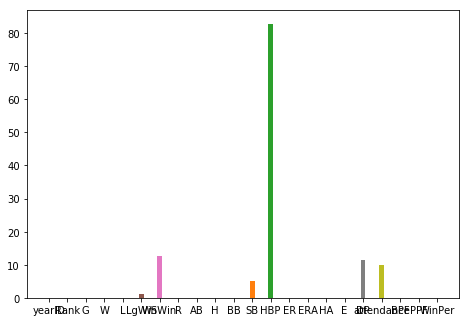

In [120]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for column in training_data:
    ax.bar(column,(training_data[column].isnull().sum()/len(training_data))*100,width=0.25)
plt.show()   

In [121]:
training_data.isnull().sum()

yearID           0
Rank             0
G                0
W                0
L                0
LgWin           28
WSWin          357
R                0
AB               0
H                0
BB               0
SB             144
HBP           2325
ER               0
ERA              0
HA               0
E                0
DP             317
attendance     279
BPF              0
PPF              0
WinPer           0
dtype: int64

In [122]:
training_data.drop("HBP",axis=1,inplace=True)
data_s.drop("HBP",axis=1,inplace=True)

In [123]:
#replacing the Nan values with 0
training_data["LgWin"] = training_data["LgWin"].fillna("N")
training_data["WSWin"] = training_data["WSWin"].fillna("N")


In [124]:
labels = training_data["WinPer"].copy()

In [125]:
training_data.drop("WinPer",axis=1,inplace=True)

In [186]:
data_s.drop("park",axis=1,inplace=True)

In [126]:
training_data.head(10)

,yearID,Rank,G,W,L,LgWin,WSWin,R,AB,H,BB,SB,ER,ERA,HA,E,DP,attendance,BPF,PPF
0,1871,3,31,20,10,N,N,401,1372,426,60,73.0,109,3.55,367,225,NaN,NaN,103,98
1,1871,2,28,19,9,N,N,302,1196,323,60,69.0,77,2.76,308,218,NaN,NaN,104,102
2,1871,8,29,10,19,N,N,249,1186,328,26,18.0,116,4.11,346,223,NaN,NaN,96,100
3,1871,7,19,7,12,N,N,137,746,178,33,16.0,97,5.17,261,163,NaN,NaN,101,107
4,1871,5,33,16,17,N,N,302,1404,403,33,46.0,121,3.72,373,227,NaN,NaN,90,88
5,1871,1,28,21,7,Y,N,376,1281,410,46,56.0,137,4.95,329,194,NaN,NaN,102,98
6,1871,9,25,4,21,N,N,231,1036,274,38,53.0,108,4.30,315,220,NaN,NaN,97,99
7,1871,6,29,13,15,N,N,351,1248,384,49,62.0,153,5.51,431,198,NaN,NaN,101,100
8,1871,4,32,15,15,N,N,310,1353,375,48,48.0,137,4.37,371,217,NaN,NaN,94,98
9,1872,2,58,35,19,N,N,617,2576,747,27,35.0,173,3.02,566,432,NaN,NaN,106,102


In [134]:
training_data.drop("yearID",axis=1,inplace=True)

In [135]:
num_attributes=["Rank","G","W","L","R","AB","H","BB","SB","ER","ERA","HA","E","DP","attendance","BPF","PPF"]
cat_attributes = ["LgWin","WSWin"]

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_pipeline =Pipeline(
    [
        ('imputer',SimpleImputer(strategy="median")),
        ('std_scaler',StandardScaler())
    ]
)

full_pipeline = ColumnTransformer([
    ("nums",num_pipeline,num_attributes),
    ("cat",OneHotEncoder(),cat_attributes)
])



In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(training_data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2244, 19) (561, 19) (2244,) (561,)


In [138]:
Xtraining_prepared = full_pipeline.fit_transform(X_train)
Xtest_prepared = full_pipeline.fit_transform(X_test)
training_prepared = full_pipeline.fit_transform(training_data)

In [139]:
training_prepared.shape
labels.shape

(2805,)

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns

In [143]:
#the Random Forest Model
rfc_model = RandomForestRegressor(criterion='mse', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rfc_model.fit(Xtraining_prepared,y_train)
# pred = rfc_model.predict(Xtest_prepared)
# print("-----The accuracy of Random Forest  model----- ")
# print("The accuracy: ",round(accuracy_score(pred,y_test)*100,2))



RandomForestRegressor(min_samples_split=10, n_estimators=700, n_jobs=-1,
                      oob_score=True, random_state=1)

In [146]:
pred =rfc_model.predict(Xtest_prepared)

In [144]:
rfc_score = cross_val_score(rfc_model,training_prepared,labels,scoring="max_error",cv=10)
print("The cross validated score is:", round(rfc_score.mean()*100,2))

The cross validated score is: -8.63


In [174]:
model = keras.models.Sequential([
    keras.layers.Dense(150,kernel_initializer="he_normal",activation="elu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(60,kernel_initializer="he_normal",activation="elu"),
    keras.layers.Dense(10,kernel_initializer="he_normal",activation="elu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1),

])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse",optimizer=optimizer)


In [175]:
model.fit(Xtraining_prepared,y_train,batch_size=12,epochs=25,validation_data =(Xtest_prepared,y_test))

Epoch 1/25
187/187 [==============================] - 1s 3ms/step - loss: 6.0675 - val_loss: 0.0496
Epoch 2/25
187/187 [==============================] - 0s 2ms/step - loss: 0.8689 - val_loss: 0.0415
Epoch 3/25
187/187 [==============================] - 0s 2ms/step - loss: 0.7037 - val_loss: 0.0188
Epoch 4/25
187/187 [==============================] - 0s 2ms/step - loss: 0.4914 - val_loss: 0.0108
Epoch 5/25
187/187 [==============================] - 0s 2ms/step - loss: 0.3864 - val_loss: 0.0138
Epoch 6/25
187/187 [==============================] - 0s 2ms/step - loss: 0.2835 - val_loss: 0.0140
Epoch 7/25
187/187 [==============================] - 0s 2ms/step - loss: 0.2209 - val_loss: 0.0126
Epoch 8/25
187/187 [==============================] - 0s 2ms/step - loss: 0.1542 - val_loss: 0.0113
Epoch 9/25
187/187 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.0129
Epoch 10/25
187/187 [==============================] - 0s 2ms/step - loss: 0.0951 - val_loss: 0.0092

In [170]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

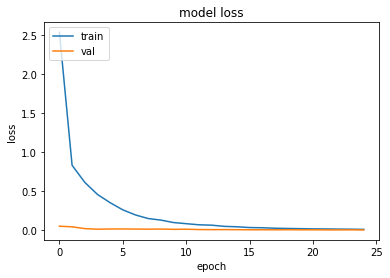

In [176]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [178]:
model.predict(Xtest_prepared)[:5]

array([[0.51808333],
       [0.45906955],
       [0.47768834],
       [0.51420933],
       [0.62789357]], dtype=float32)

In [179]:
y_test[:5]

1091    0.477707
1041    0.397436
1521    0.419753
2504    0.500000
1518    0.672840
Name: WinPer, dtype: float64

In [180]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               3300      
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 60)                9060      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                610       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 12,981
Trainable params: 12,981
Non-trainable params: 0
__________________________________________________

In [184]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,"jsmodel")
model.save("games.h5")


C:\Users\HP\Anaconda3\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [232]:
data_s =pd.read_csv("data.csv")
name = data_s["name"]
year = data_s["yearID"]
data_s.drop(["name","yearID"],axis=1,inplace=True)

In [233]:
values = full_pipeline.fit_transform(data_s)
values[1]

array([-1.38902971,  0.13206764,  0.95871068, -0.9552454 ,  1.03848264,
        0.68727549,  0.61229115,  1.04115698, -0.77831043, -0.58979428,
       -0.63295839, -1.05223718, -1.06860244, -0.04934183,  0.40677504,
        1.53907067,  1.35447717,  0.        ,  1.        ,  0.        ,
        1.        ])

In [246]:
newdf = pd.concat([year,name],axis=1)
newdf.head(10)

,yearID,name
0,2001,Anaheim Angels
1,2001,Arizona Diamondbacks
2,2001,Atlanta Braves
3,2001,Baltimore Orioles
4,2001,Boston Red Sox
5,2001,Chicago White Sox
6,2001,Chicago Cubs
7,2001,Cincinnati Reds
8,2001,Cleveland Indians
9,2001,Colorado Rockies


In [247]:
data_s = pd.DataFrame(values,columns=['Rank','G','LgWin','WSWin','R','AB','H','BB','SB','ER','ERA','HA','E','DP','attendance','BPF','PPF','W1','W2','L1','L2'])


In [248]:
data_s.head(10)

,Rank,G,LgWin,WSWin,R,AB,H,BB,SB,ER,...,HA,E,DP,attendance,BPF,PPF,W1,W2,L1,L2
0,-0.015264,0.132068,-0.519052,0.524930,-0.519528,0.128217,0.033004,-0.335147,0.720861,-0.044097,...,0.087507,0.127438,-0.398093,-0.671535,0.162950,0.160521,1.0,0.0,1.0,0.0
1,-1.389030,0.132068,0.958711,-0.955245,1.038483,0.687275,0.612291,1.041157,-0.778310,-0.589794,...,-1.052237,-1.068602,-0.049342,0.406775,1.539071,1.354477,0.0,1.0,0.0,1.0
2,-1.389030,0.132068,0.611002,-0.606969,-0.053351,-0.545195,-0.151874,-0.349946,-0.311902,-1.197503,...,-0.926865,0.127438,-0.921220,0.534435,0.556127,0.359514,1.0,0.0,1.0,0.0
3,0.671619,0.132068,-1.562179,1.482691,-0.568599,-0.875548,-1.051618,-0.039168,1.287214,0.861265,...,0.680174,1.512326,-0.688719,0.932185,-1.016582,-0.834443,1.0,0.0,1.0,0.0
4,-0.702147,-3.169623,0.089438,-0.171623,0.474164,0.814334,0.599966,0.049626,-1.611183,-0.093706,...,-0.368391,0.756933,-1.153720,0.243873,0.359539,0.160521,1.0,0.0,1.0,0.0
5,-0.015264,0.132068,0.176366,-0.171623,0.793127,-0.977196,0.230208,0.049626,0.954065,0.625623,...,0.235674,1.071680,0.008783,-1.015681,0.752716,0.558506,1.0,0.0,1.0,0.0
6,-0.015264,0.132068,0.611002,-0.606969,0.535503,-1.714137,-0.435355,0.893167,-0.911570,-0.391359,...,-0.995250,0.505135,-2.083723,0.469835,-1.016582,-1.033436,1.0,0.0,1.0,0.0
7,1.358502,0.132068,-1.301397,1.308553,0.020255,0.534805,0.242534,-0.719921,0.287767,1.121712,...,1.455200,2.330670,-0.746844,-0.849162,0.949305,0.956492,1.0,0.0,1.0,0.0
8,-1.389030,0.132068,0.871783,-0.868176,2.007639,0.750805,1.413433,0.893167,-0.511791,0.886069,...,0.771354,0.379236,-0.688719,1.050467,-0.033639,-0.038472,1.0,0.0,1.0,0.0
9,1.358502,0.132068,-0.692907,0.699069,2.326601,1.894335,2.695259,-0.083565,1.253899,2.064280,...,0.885328,-0.313209,1.055037,1.037709,4.291312,4.339368,1.0,0.0,1.0,0.0


In [256]:
new = pd.concat([data_s,newdf],axis=1)

In [258]:
new.to_csv("data.csv",index=False)